In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
import tensorflow.keras.layers as layers
from tensorflow import keras

2024-06-29 14:59:15.972520: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-29 14:59:15.972549: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-29 14:59:15.973552: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-06-29 14:59:15.979026: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-29 14:59:16.519235: W tensorflow/compiler/tf2

In [2]:
(train, test) = mnist.load_data()
train_x = np.array(train[0])
train_x = np.expand_dims(train_x, axis=3)
train_y = np.array(train[1])
train_y = np.int16(train_y)


test_x = np.array(test[0])
test_x = np.expand_dims(test_x, axis=3)
test_y = np.array(test[1])
test_y = np.int16(test_y)

In [3]:
permute = [i for i in range(50000)]
np.random.shuffle(permute)

val_x = train_x[permute[40000:]]
val_y = tf.one_hot(train_y[permute[40000:]], 10)


train_x = train_x[permute[:40000]]
train_y = tf.one_hot(train_y[permute[:40000]], 10)

2024-06-29 14:59:18.423097: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-06-29 14:59:18.453865: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-06-29 14:59:18.454103: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

In [4]:
test_x = test_x
test_y = tf.one_hot(test_y, 10)

0


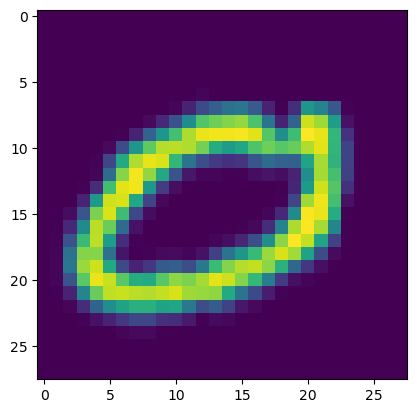

In [8]:
data_augmentation = keras.Sequential(
                        [
                        layers.RandomRotation(0.05),
                        layers.RandomZoom(0.05),
                        layers.RandomBrightness(0.05),
                        layers.RandomContrast(0.05),
                        layers.RandomTranslation(0.05,0.05)
                        ]
)

# i = np.random.randint(0, 10000)
plt.imshow(np.int16(data_augmentation(train_x[i])))
print(np.argmax(train_y[i]))

In [9]:
data_augmentation = keras.Sequential(
                        [
                        layers.RandomRotation(0.05),
                        layers.RandomZoom(0.1),
                        layers.RandomBrightness(0.05),
                        layers.RandomContrast(0.05),
                        layers.RandomTranslation(0.05,0.05)
                        ]
)

Inputs = layers.Input(shape=(28,28,1))

x = data_augmentation(Inputs)

x = layers.BatchNormalization()(x)
x = layers.Conv2D(32, kernel_size=3, activation="relu", padding="same")(x)
x = layers.MaxPool2D(pool_size=(3,3), strides=2, padding="same")(x)

x = layers.BatchNormalization()(x)
x = layers.Conv2D(64, kernel_size=3, activation="relu", padding="same")(x)
x = layers.MaxPool2D(pool_size=(3,3), strides=2, padding="same")(x)

x = layers.BatchNormalization()(x)
x = layers.Conv2D(128, kernel_size=3, activation="relu", padding="same")(x)
x = layers.MaxPool2D(pool_size=(3,3), strides=2, padding="same")(x)

x = layers.Conv2D(64, kernel_size=1, activation="relu", padding="same")(x)

x = layers.Flatten()(x)
x = layers.Dropout(0.1)(x)

x = layers.BatchNormalization()(x)
x = layers.Dense(128, activation="relu")(x)
x = layers.Dense(64, activation="relu")(x)
Outputs = layers.Dense(10, activation="softmax")(x)

MNIST = keras.Model(Inputs, Outputs)

MNIST.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [10]:
MNIST.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 sequential_4 (Sequential)   (None, 28, 28, 1)         0         
                                                                 
 batch_normalization (Batch  (None, 28, 28, 1)         4         
 Normalization)                                                  
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 batch_normalization_1 (Bat  (None, 14, 14, 32)        128   

In [12]:
callbacks = [keras.callbacks.ModelCheckpoint("MNIST",save_best_only=True)]
history = MNIST.fit(train_x, train_y, epochs=30, callbacks=callbacks, validation_data=(val_x,val_y))

Epoch 1/30


2024-06-29 14:59:51.976431: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8907
2024-06-29 14:59:53.170320: I external/local_xla/xla/service/service.cc:168] XLA service 0x79c1198f9ff0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-06-29 14:59:53.170341: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 Laptop GPU, Compute Capability 8.6
2024-06-29 14:59:53.174467: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1719653393.250006   33781 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1245/1250 [============================>.] - ETA: 0s - loss: 0.1958 - accuracy: 0.9393INFO:tensorflow:Assets written to: MNIST/assets


INFO:tensorflow:Assets written to: MNIST/assets


1250/1250 [==============================] - 11s 6ms/step - loss: 0.1955 - accuracy: 0.9395 - val_loss: 0.1911 - val_accuracy: 0.9523
Epoch 2/30
1244/1250 [============================>.] - ETA: 0s - loss: 0.0956 - accuracy: 0.9711INFO:tensorflow:Assets written to: MNIST/assets


INFO:tensorflow:Assets written to: MNIST/assets


1250/1250 [==============================] - 7s 5ms/step - loss: 0.0954 - accuracy: 0.9712 - val_loss: 0.0927 - val_accuracy: 0.9681
Epoch 3/30
1250/1250 [==============================] - 5s 4ms/step - loss: 0.0889 - accuracy: 0.9734 - val_loss: 0.6258 - val_accuracy: 0.8595
Epoch 4/30
1250/1250 [==============================] - 5s 4ms/step - loss: 0.0753 - accuracy: 0.9761 - val_loss: 0.1563 - val_accuracy: 0.9591
Epoch 5/30
1248/1250 [============================>.] - ETA: 0s - loss: 0.0662 - accuracy: 0.9800INFO:tensorflow:Assets written to: MNIST/assets


INFO:tensorflow:Assets written to: MNIST/assets


1250/1250 [==============================] - 7s 5ms/step - loss: 0.0661 - accuracy: 0.9801 - val_loss: 0.0367 - val_accuracy: 0.9892
Epoch 6/30
1246/1250 [============================>.] - ETA: 0s - loss: 0.0636 - accuracy: 0.9803INFO:tensorflow:Assets written to: MNIST/assets


INFO:tensorflow:Assets written to: MNIST/assets


1250/1250 [==============================] - 6s 5ms/step - loss: 0.0635 - accuracy: 0.9803 - val_loss: 0.0352 - val_accuracy: 0.9903
Epoch 7/30
1250/1250 [==============================] - 5s 4ms/step - loss: 0.0546 - accuracy: 0.9829 - val_loss: 0.0382 - val_accuracy: 0.9901
Epoch 8/30
1250/1250 [==============================] - 5s 4ms/step - loss: 0.0586 - accuracy: 0.9815 - val_loss: 0.0735 - val_accuracy: 0.9810
Epoch 9/30
1250/1250 [==============================] - 5s 4ms/step - loss: 0.0522 - accuracy: 0.9830 - val_loss: 0.0409 - val_accuracy: 0.9874
Epoch 10/30
1250/1250 [==============================] - 5s 4ms/step - loss: 0.0491 - accuracy: 0.9858 - val_loss: 0.0459 - val_accuracy: 0.9903
Epoch 11/30
1250/1250 [==============================] - 5s 4ms/step - loss: 0.0499 - accuracy: 0.9845 - val_loss: 0.0549 - val_accuracy: 0.9854
Epoch 12/30
1238/1250 [============================>.] - ETA: 0s - loss: 0.0456 - accuracy: 0.9867INFO:tensorflow:Assets written to: MNIST/assets

INFO:tensorflow:Assets written to: MNIST/assets


1250/1250 [==============================] - 7s 6ms/step - loss: 0.0456 - accuracy: 0.9867 - val_loss: 0.0344 - val_accuracy: 0.9914
Epoch 13/30
1250/1250 [==============================] - 5s 4ms/step - loss: 0.0457 - accuracy: 0.9862 - val_loss: 0.0517 - val_accuracy: 0.9855
Epoch 14/30
1241/1250 [============================>.] - ETA: 0s - loss: 0.0472 - accuracy: 0.9854INFO:tensorflow:Assets written to: MNIST/assets


INFO:tensorflow:Assets written to: MNIST/assets


1250/1250 [==============================] - 6s 5ms/step - loss: 0.0470 - accuracy: 0.9854 - val_loss: 0.0328 - val_accuracy: 0.9910
Epoch 15/30
1250/1250 [==============================] - 5s 4ms/step - loss: 0.0393 - accuracy: 0.9878 - val_loss: 0.0536 - val_accuracy: 0.9858
Epoch 16/30
1243/1250 [============================>.] - ETA: 0s - loss: 0.0396 - accuracy: 0.9869INFO:tensorflow:Assets written to: MNIST/assets


INFO:tensorflow:Assets written to: MNIST/assets


1250/1250 [==============================] - 7s 6ms/step - loss: 0.0395 - accuracy: 0.9869 - val_loss: 0.0275 - val_accuracy: 0.9923
Epoch 17/30
1244/1250 [============================>.] - ETA: 0s - loss: 0.0393 - accuracy: 0.9881INFO:tensorflow:Assets written to: MNIST/assets


INFO:tensorflow:Assets written to: MNIST/assets


1250/1250 [==============================] - 7s 5ms/step - loss: 0.0395 - accuracy: 0.9880 - val_loss: 0.0254 - val_accuracy: 0.9936
Epoch 18/30
1250/1250 [==============================] - 5s 4ms/step - loss: 0.0388 - accuracy: 0.9881 - val_loss: 0.0386 - val_accuracy: 0.9897
Epoch 19/30
1250/1250 [==============================] - 5s 4ms/step - loss: 0.0360 - accuracy: 0.9891 - val_loss: 0.0342 - val_accuracy: 0.9923
Epoch 20/30
1250/1250 [==============================] - 5s 4ms/step - loss: 0.0343 - accuracy: 0.9898 - val_loss: 0.0302 - val_accuracy: 0.9913
Epoch 21/30
1250/1250 [==============================] - 5s 4ms/step - loss: 0.0343 - accuracy: 0.9895 - val_loss: 0.0261 - val_accuracy: 0.9923
Epoch 22/30
1250/1250 [==============================] - 5s 4ms/step - loss: 0.0348 - accuracy: 0.9891 - val_loss: 0.0397 - val_accuracy: 0.9922
Epoch 23/30
1250/1250 [==============================] - 5s 4ms/step - loss: 0.0298 - accuracy: 0.9913 - val_loss: 0.0379 - val_accuracy: 0.99

In [15]:
test_y = np.array(test_y)

Accuracy: 0.99


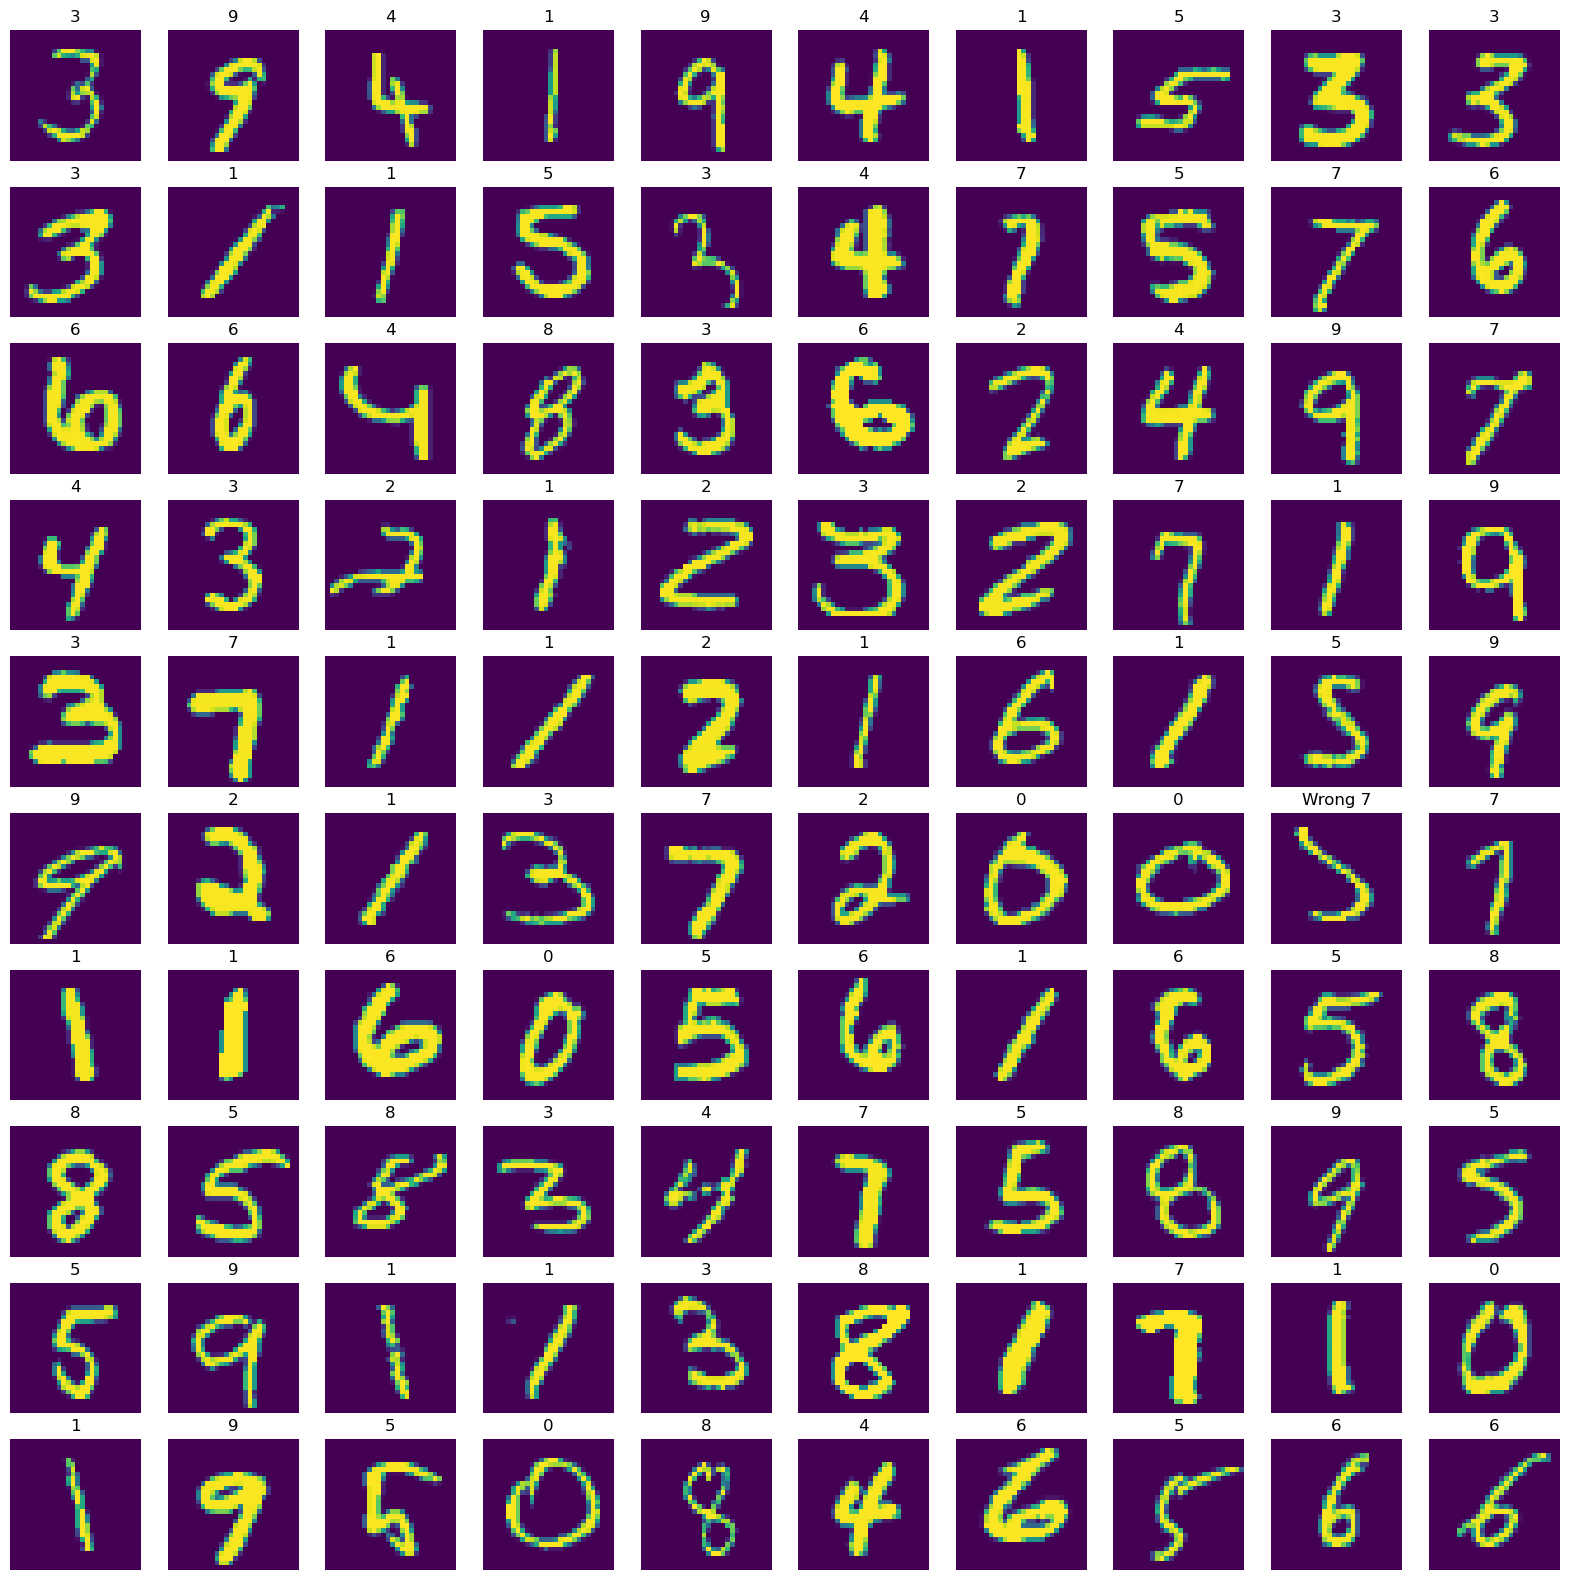

In [21]:
num_samples = test_x.shape[0]
random_indices = np.random.choice(num_samples, 100, replace=False)

X_sample = test_x[random_indices]
y_sample = test_y[random_indices]
predictions = []
correct_count = 0

plt.figure(figsize=( 20, 20))
for i in range(len(X_sample)):
    ax = plt.subplot(10, 10, i+1)
    plt.imshow(X_sample[i])
    predictions.append(np.argmax(MNIST.predict(np.expand_dims(X_sample[i], axis=0), verbose=0)))
    if predictions[i] == np.argmax(y_sample[i]):
        correct_count += 1
        plt.title(predictions[i])
    else:
        plt.title("Wrong "+ str(predictions[i]))
    plt.axis("off")

print(f"Accuracy: {correct_count/len(X_sample)}")
plt.show()